In [1]:
from pydmtgraph.dmtgraph import DMTGraph
from pydmtgraph.helper import plotGraph
from compute_barcode import compute_peristence_barcode_from_skeleton
import gudhi as gd
from analyze_barcode import average_branch_length

In [11]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
# helper functions to preprocess images
def blur(im, n_itr=5):
    im_blur = np.copy(im)
    for _ in range(n_itr):
        im_blur = cv2.GaussianBlur(im_blur, (3,3), 0)
    return im_blur

def sharpen(im, n_itr=5):
    kernel = 1/34 * np.array([[ 0,  0, -1,  0,  0],
                              [ 0, -1, -2, -1,  0],
                              [-1, -2, 17, -2, -1],
                              [ 0, -1, -2, -1,  0],
                              [ 0,  0, -1,  0,  0]])
    im_sharpen = np.copy(im)
    for _ in range(n_itr):
        im_sharpen += np.abs(cv2.filter2D(im_sharpen, -1, kernel))

    return im_sharpen

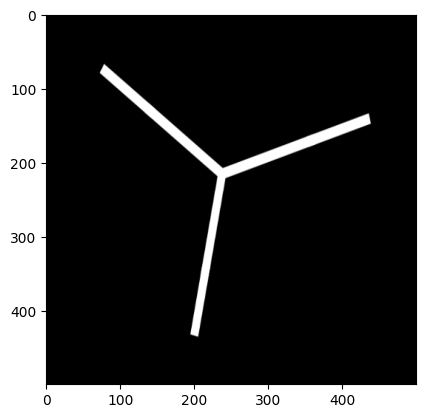

In [13]:
# Read in image and resize it to 500x500
img = cv2.imread("mask.tif", cv2.IMREAD_GRAYSCALE).astype(np.double)
img = cv2.resize(img, (500, 500))
plt.imshow(img, cmap="gray")

In [14]:
# Run preprocessing steps on image
img = blur(img)
img = sharpen(img)
img = blur(img)

In [15]:
G = DMTGraph(img)

In [16]:
vertices, edges = G.computeGraph(0.5, 0.0)

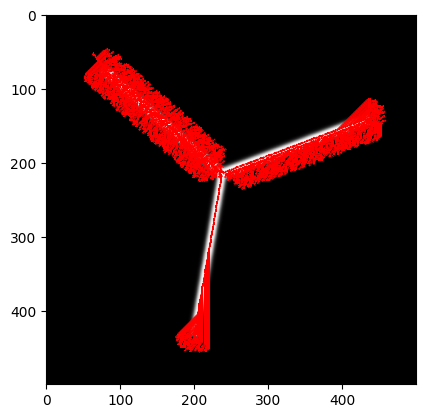

In [17]:
fig, ax = plt.subplots()
ax.imshow(img, cmap="gray")
plotGraph(vertices, edges, ax)

In [18]:
barcode = compute_peristence_barcode_from_skeleton(edges, vertices)

In [19]:
len(vertices)

12575

usetex mode requires TeX.


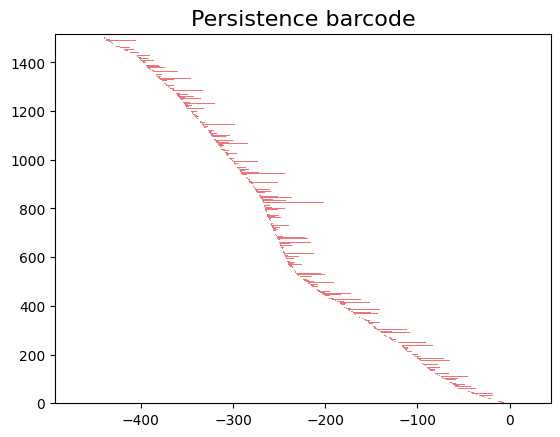

In [20]:
gd.plot_persistence_barcode(barcode)
plt.show()

In [23]:
barcode

array([[-442.64675298, -441.23253942],
       [-443.06096654, -441.06096654],
       [-443.23253942, -440.23253942],
       ...,
       [  -2.41421356,    0.        ],
       [-409.19595949,    0.        ],
       [-448.47518011,           inf]])

In [29]:
len(barcode)

1518

In [2]:
average_branch_length(barcode)

NameError: name 'barcode' is not defined